##  Sagemaker Training uisng RemixAutoML R Custom Docker Container

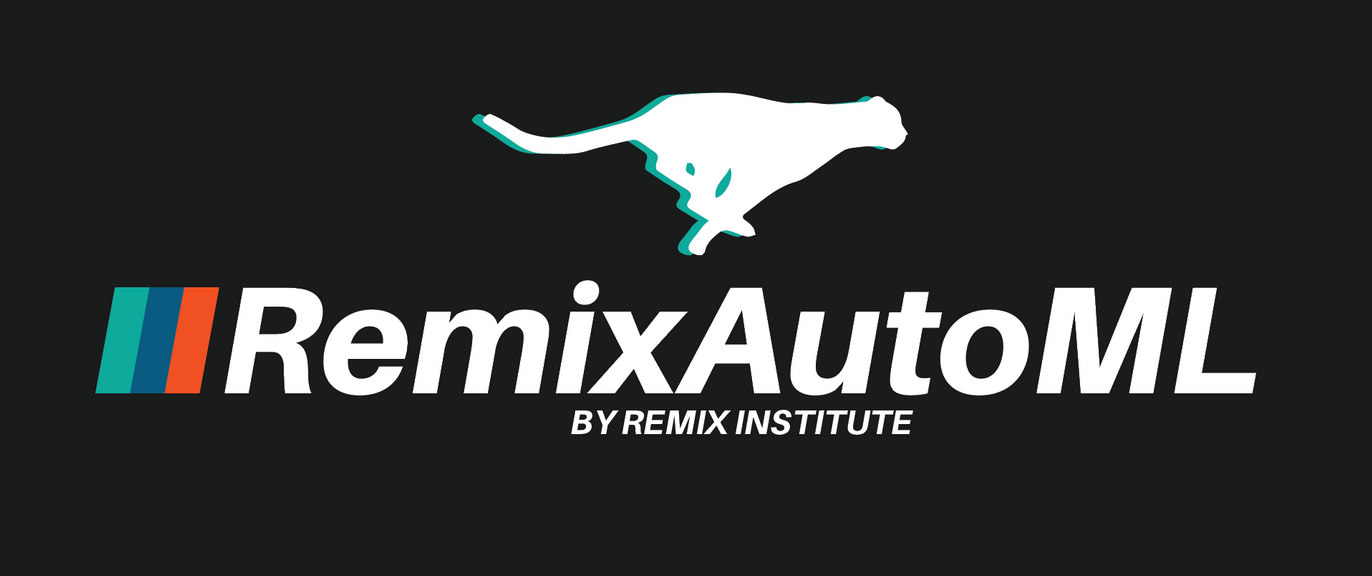

In [1]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner
import pandas as pd
import sagemaker
import boto3
import os

### Setup

In [2]:
bucket = 'arunprsh-sagemaker'
prefix = 'autots'
algorithm_name = 'autots'
docker_image_uri = '892313895307.dkr.ecr.us-east-1.amazonaws.com/autots:latest'
role = sagemaker.get_execution_role()

### Train

In [3]:
autots_estimator = sagemaker.estimator.Estimator(
        image_name=docker_image_uri,
        role=role,
        train_instance_count=2,
        train_instance_type='ml.m4.xlarge',
        output_path='s3://{}/{}/output'.format(bucket, prefix),
        sagemaker_session=sagemaker.Session()
)

In [4]:
autots_estimator.fit({'train': 's3://{}/{}/train'.format(bucket, prefix)})

2020-07-24 18:42:20 Starting - Starting the training job...
2020-07-24 18:42:22 Starting - Launching requested ML instances......
2020-07-24 18:43:37 Starting - Preparing the instances for training......
2020-07-24 18:44:40 Downloading - Downloading input data
2020-07-24 18:44:40 Training - Downloading the training image..........Loading required package: forecast
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: tseries

Attaching package: ‘lubridate’

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union

Attaching package: ‘data.table’

The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, qu

[1] "list(Date = c(15646, 15653, 15660, 15667, 15674, 15681, 15688, 15695, 15702, 15709, 15716, 15723, 15730, 15737, 15744, 15751), Forecast_NN = c(2374576.18429646, 2373806.62894056, 2088762.19196521, 2730150.39761213, 2399331.61679582, 2343362.4493081, 2682195.86682063, 2829993.8080822, 1781656.53633201, 1841888.54879805, 2158354.97122793, 1951033.39342349, 2007026.41114367, 2244753.98055791, 2330233.85982493, 2204195.55213472), NN_Low80 = c(2374459.14801116, 2373695.1529755, 2088623.53700616, 2730019.69642534, \n2399208.30093801, 2343228.94348001, 2682068.87433505, 2829874.3660814, 1781535.36108275, 1841757.51139505, 2158227.03324947, 1950905.88546318, 2006901.7407878, 2244625.66733006, 2330104.00148519, 2204049.73192915), NN_Low95 = c(2374409.21657332, 2373631.24682916, 2088550.14266191, 2729944.0941101, 2399136.08924736, 2343167.50939729, 2681994.57076936, 2829819.74855035, 1781475.10957352, 1841689.57809653, 2158156.41896418, 1950842.19532967, 2006827.9969995, 2244558.53667145, 2


2020-07-24 18:48:38 Uploading - Uploading generated training model
2020-07-24 18:48:38 Completed - Training job completed
Training seconds: 498
Billable seconds: 498


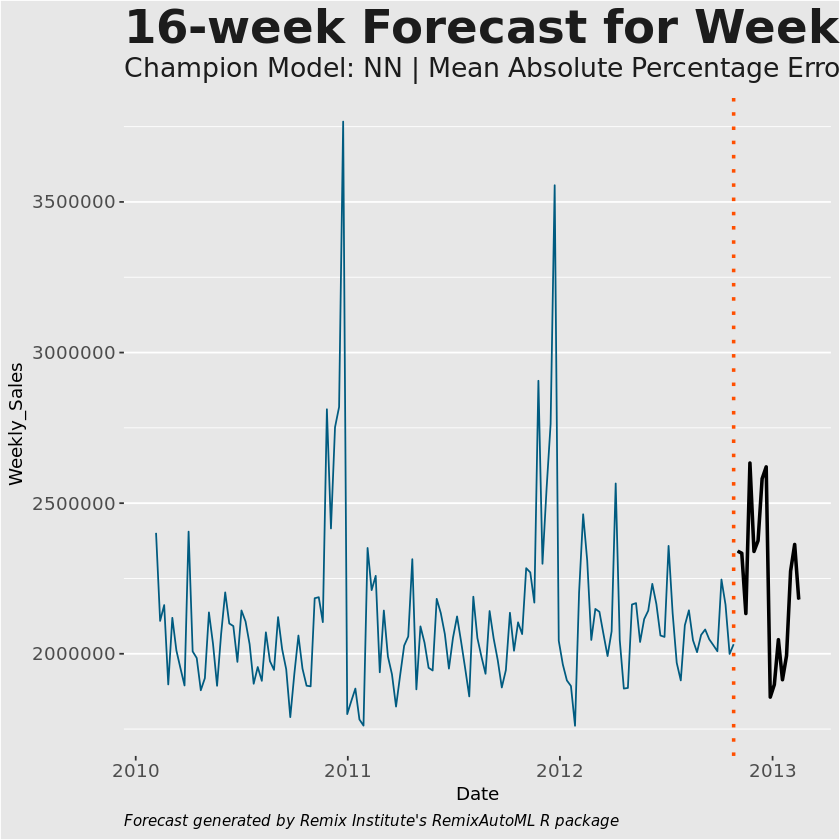